# Investigating the Ford GoBike System Data
## by Afnan AlRashoud

## Investigation Overview

> We would like to present our findings after we've investigated the Ford GoBike System Data

## Dataset Overview

> The dataset includes information about bike trips made using the system Ford GoBike.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import date

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
gobike = pd.read_csv('201902-fordgobike-tripdata.csv')

In [4]:
#Dropping nulls
gobike.dropna(axis = 0, subset=['start_station_id', 'member_birth_year', 'member_gender'], inplace =True)
#Converting birth year from float to int
gobike['member_birth_year'] = gobike['member_birth_year'].astype(int)
#Creating a new column by calculating the user age
current_year = date.today().year
gobike['age'] = current_year - gobike['member_birth_year']
#Creating a function to assign each user to a group based on their age
def age_group(age):
    if age <= 17:
        return 'Kids'
    if age >= 18 and age <= 27:
        return 'Young Adults'
    if age <= 44:
        return 'Adults'
    if age <= 69:
        return 'Middle-Aged'
    if age >= 70:
        return 'Elderly'

gobike['age_group'] = gobike.age.apply(age_group)

#Changing data type to category
cats = [['Subscriber', 'Customer'], ['Male', 'Female', 'Other'], ['Kids', 'Young Adults', 'Adults', 'Middle-Aged', 'Elderly']]
cols = ['user_type', 'member_gender', 'age_group']
for col in cols:
    i = cols.index(col)
    cat = pd.api.types.CategoricalDtype(cats[i], ordered =True)
    gobike[col] = gobike[col].astype(cat)

## Total Trips Across Genders

The pie chart shows that there's a huge difference between the number trips made by Male users vs Female users (%75 to %23)!

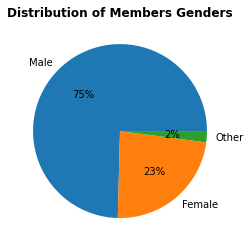

In [5]:
genders = gobike.member_gender.value_counts()
plt.pie(x = genders.values, labels = genders.index, autopct = '%.f%%')
plt.title('Distribution of Members Genders',  weight = 'bold', size = 'large');

## Average Trip Duaration Between Genders

> Although the number of trips made male exceeds the one made female (by a huge difference!), we notice the average trip duration among female trips last more. 

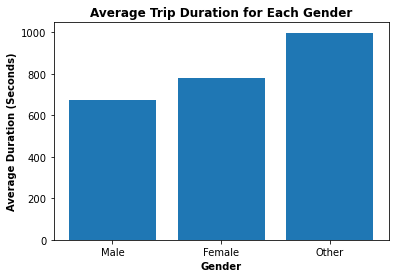

In [6]:
avg_duration_gender = gobike.groupby('member_gender').mean().reset_index()
#We'll use a bar chart beacaue age_group is nominal and duaration_sec is numeric
plt.bar(data = avg_duration_gender, x = 'member_gender', height = 'duration_sec')
plt.title('Average Trip Duration for Each Gender', weight = 'bold', size = 'large')
plt.ylabel('Average Duration (Seconds)', weight = 'bold')
plt.xlabel('Gender', weight = 'bold');

## Gender, Age Group, User Type and Total Trips

> We noticed that none of the trips were made by elderly females (older than 69). Also, none of the trips records a user who is aged 17 or less.
> We also noticed that the total numbers made by subscribers were higher by a huge percentage than customers' total trip.

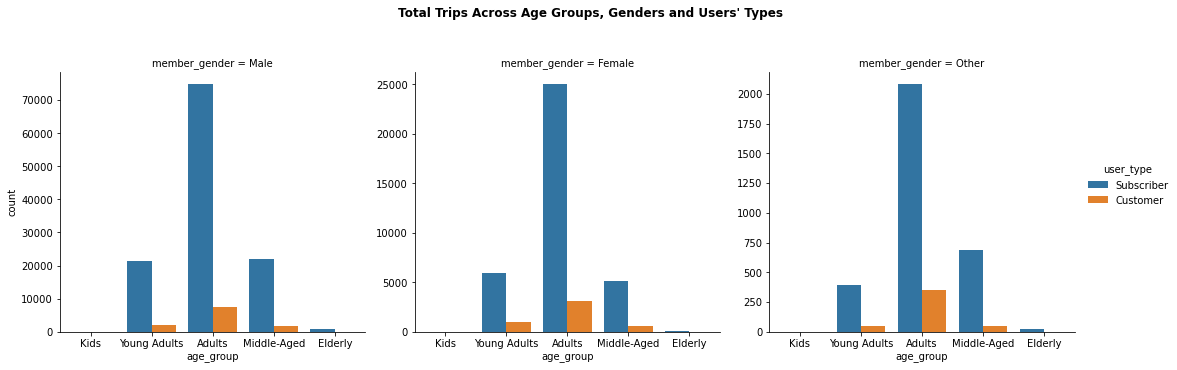

In [7]:
ax = sb.catplot(data=gobike, x='age_group', col='member_gender',hue='user_type', kind='count', sharey=False)
ax.fig.subplots_adjust(top=.8)
ax.fig.suptitle("Total Trips Across Age Groups, Genders and Users' Types", weight = 'bold', size = 'large');